In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
%cp /content/drive/MyDrive/CSVs/* ./

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [3]:
from pandas_datareader import data as pdr
from datetime import datetime

ModuleNotFoundError: No module named 'pandas_datareader'

In [526]:
df = pd.read_csv('/content/Apple_stock.csv')

In [527]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,39.840000,39.119999,39.632500,39.435001,140014000.0,38.338478
1,2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229
2,2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078
3,2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034370
4,2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954170


In [528]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
248,2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.129517
249,2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.520905
250,2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.493759
251,2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.918083
252,2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.443558


#Closing Price Analysis

In [529]:
close = df['Close']
print(close)

0      39.435001
1      39.480000
2      35.547501
3      37.064999
4      36.982498
         ...    
248    71.067497
249    72.477501
250    72.449997
251    72.879997
252    73.412498
Name: Close, Length: 253, dtype: float64


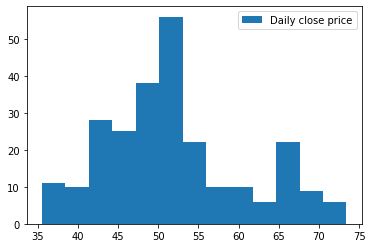

In [530]:
plt.hist(close,bins="rice",label="Daily close price")
plt.legend()
plt.show()

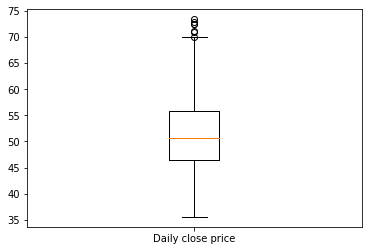

In [531]:
plt.boxplot(close,labels=["Daily close price"])
plt.show()

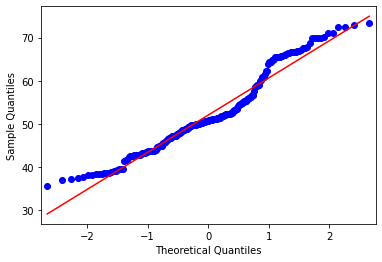

In [532]:
from statsmodels.graphics.gofplots import qqplot
qqplot(close, line='s')
plt.show()

In [533]:
# Summary of stock price descriptive analysis
print("Mean is: ", np.mean(close))
print("Standard deviation is: ", np.std(close))
print("Median is: ", np.quantile(close,0.5))
print("Skewness of the distribution is: ", stats.skew(close))
print("Skewtest of the distribution is: ", stats.skewtest(close))
print("Kurtosis of the distributionn is: ", stats.kurtosis(close))
print("Kurtosis test of the distribution is: ", stats.kurtosistest(close))

Mean is:  52.01407110643952
Standard deviation is:  8.63697421408136
Median is:  50.724998474121094
Skewness of the distribution is:  0.5624153223275167
Skewtest of the distribution is:  SkewtestResult(statistic=3.5237456559966773, pvalue=0.00042549247141409507)
Kurtosis of the distributionn is:  -0.3060753558059197
Kurtosis test of the distribution is:  KurtosistestResult(statistic=-0.9865315410802911, pvalue=0.3238723453990211)


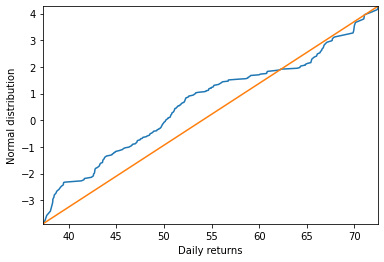

In [534]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(close,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

#**Stock Return Analysis**

In [535]:
## Daily Return
returns = close.pct_change(1).dropna()
returns = returns * 100
print(returns)

1      0.114107
2     -9.960737
3      4.268930
4     -0.222583
5      1.906312
         ...   
248    0.095067
249    1.984034
250   -0.037948
251    0.593513
252    0.730655
Name: Close, Length: 252, dtype: float64


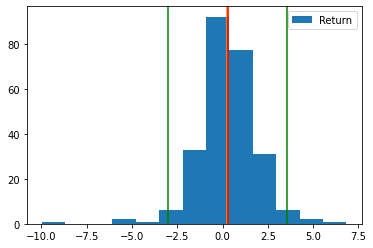

In [536]:
plt.hist(returns, bins="rice", label="Return")
plt.axvline(returns.mean(), color='darkorange')
plt.axvline(returns.median(), color='red')
plt.axvline(returns.mean() - 2*returns.std(), color='green')
plt.axvline(returns.mean() + 2*returns.std(), color='green')

plt.legend()
plt.show()

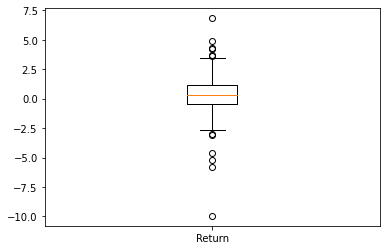

In [537]:
plt.boxplot(returns ,labels=["Return"])
plt.show()

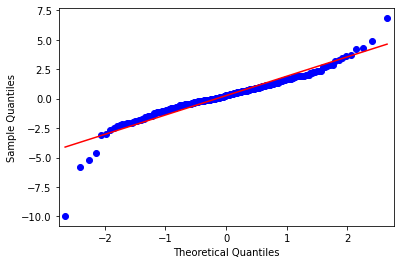

In [538]:
from statsmodels.graphics.gofplots import qqplot
qqplot(returns, line='s')
plt.show()

In [539]:
# Summary of stock price descriptive analysis
print("Mean is: ", np.mean(returns))
print("Standard deviation is: ", np.std(returns))
print("Median is: ", np.quantile(returns,0.5))
print("Skewness of the distribution is: ", stats.skew(returns))
print("Skewtest of the distribution is: ", stats.skewtest(returns))
print("Kurtosis of the distributionn is: ", stats.kurtosis(returns))
print("Kurtosis test of the distribution is: ", stats.kurtosistest(returns))

Mean is:  0.26057059797942517
Standard deviation is:  1.6459549972153602
Median is:  0.275252995760189
Skewness of the distribution is:  -0.9066413114103413
Skewtest of the distribution is:  SkewtestResult(statistic=-5.256202930970021, pvalue=1.470600157903429e-07)
Kurtosis of the distributionn is:  7.002579343311439
Kurtosis test of the distribution is:  KurtosistestResult(statistic=6.728824415380868, pvalue=1.7103929728413623e-11)


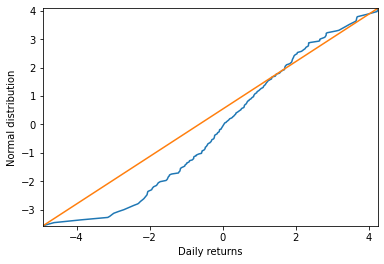

In [540]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()